<a href="https://colab.research.google.com/github/kdeligiorgis/UWB_DWM1000/blob/main/Trilateration_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trilateration Code for RTLS with UWB**


In [ ]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
from IPython import display
from time import sleep  
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [ ]:
dict_data = {}
# filename = "Lab.txt"
# filename = "Living_Room.txt"
#filename =  "/gdrive/MyDrive/Living_Room.txt" #Read from GoogleDrive
with open(filename, "r") as f:
  for line in f:
    split_line = line.split()
    if len(split_line) != 4:
      continue
    base, dist  = line.split()[1:3]
    dict_data.setdefault(base[:-1], []).append(float(dist))

Trilateration Code


In [ ]:
def trilateration(dict_base, dict_dist):
  x1, y1 = dict_base["A"]["x"], dict_base["A"]["y"]
  x2, y2 = dict_base["B"]["x"], dict_base["B"]["y"]
  x3, y3 = dict_base["C"]["x"], dict_base["C"]["y"]  

  d1 = dict_dist["A"]
  d2 = dict_dist["B"]
  d3 = dict_dist["C"]


  x_n11 = (d1**2 - d2**2) - (x1**2 - x2**2) - (y1**2 - y2**2)
  x_n21 = (d1**2 - d3**2) - (x1**2 - x3**2) - (y1**2 - y3**2)

  x_n12 = 2*(y2-y1)
  x_n22 = 2*(y3-y1)
  
  d11 = 2*(x2-x1)
  d21 = 2*(x3-x1)
  d12 = 2*(y2-y1)
  d22 = 2*(y3-y1)
  
  x_n = np.array(
      [
       [x_n11, x_n12], 
       [x_n21, x_n22],
      ]
  )
  d = np.array(
      [
       [d11, d12],  
       [d21, d22],
       ]
  )
    
  y_n11 = d11
  y_n21 = d21
  y_n12 = x_n11
  y_n22 = x_n21
  
  y_n = np.array(
      [
       [y_n11, y_n12],
       [y_n21, y_n22],
       ]
  )
  
  x = np.linalg.det(x_n) / np.linalg.det(d)
  y = np.linalg.det(y_n) / np.linalg.det(d)

  return x, y

**Lab Coordinates**


In [ ]:
# base_pos = {
#     "A": {
#         "x": 0,
#         "y": 0,
#     },
#     "B": {
#         "x": 8.7,
#         "y": 1,
#     },
#     "C": {
#         "x": 9.7,
#         "y": 5,
#     }
# }

**Living Room Coordinates**

In [ ]:
# base_pos = {
#     "A": {
#         "x": 0,
#         "y": 0,
#     },
#     "B": {
#         "x": 4.36,
#         "y": 1.22,
#     },
#     "C": {
#         "x": 4.34,
#         "y": -1.04,
#     }
# }

Plot coordinates of Lab/Living Room

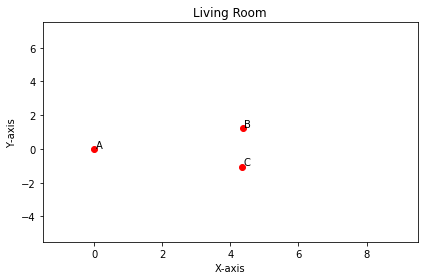

In [ ]:
def plot_coords(base_pos, x_obj=None, y_obj=None, pause=1, counter=None):
  fig, ax = plt.subplots()
  for base, coords in base_pos.items():
    x, y = coords["x"], coords["y"]
    ax.scatter(x, y, c="red")
    plt.text(x + 0.05, y + 0.05, base)

  # ax.scatter(x1,y1,c="black")

  if x_obj is not None and y_obj is not None:
    ax.scatter(x_obj, y_obj)
  

  # x_A = base_pos['A']['x'] 
  # y_A = base_pos['A']['y'] 
  # x_B = base_pos['B']['x'] 
  # y_B = base_pos['B']['y'] 
  # x_C = base_pos['C']['x'] 
  # y_C = base_pos['C']['y'] 
  # circle1 = plt.Circle((x_A,y_A), dict_data['A'][5] , color='b', facecolor=None, fill=False)
  # circle2 = plt.Circle((x_B,y_B), dict_data['B'][5] , color='b', facecolor=None, fill=False)
  # circle3 = plt.Circle((x_C,y_C), dict_data['C'][5] , color='b', facecolor=None, fill=False)

  # ax.add_patch(circle1)
  # ax.add_patch(circle2)
  # ax.add_patch(circle3)

# For LAB
  # plt.title("LAB")
  # plt.xlabel("Χ-axis")
  # plt.ylabel("Υ-axis")
  # plt.xlim(-4.5, 12.5)
  # plt.ylim(-0.5, 11.5)

# For Living Room
  plt.title("Living Room")
  plt.xlabel("Χ-axis")
  plt.ylabel("Υ-axis")
  plt.xlim(-1.5, 9.5)
  plt.ylim(-5.5, 7.5)
  
  plt.tight_layout()
  

  if counter is not None:
    plt.savefig(f"fig_{counter}.png")

plot_coords(base_pos)

In [ ]:
for n in range(len(dict_data["A"])):
  data = {base: dict_data[base][n] for base in dict_data}
  x, y = trilateration(base_pos, data)
  plot_coords(base_pos, round(x, 2), round(y, 2), 1, counter=n) 

Save as GIF

In [ ]:
with imageio.get_writer('Living_Room.gif', mode='I',fps=2) as writer:
    for filename in [f'fig_{n}.png' for n in range(len(dict_data["A"]))]:
        image = imageio.imread(filename)
        writer.append_data(image) 